### Предварительные сведения

Рассмотрим сначала методы для импорта и генерации сигналов в `Python`, а также методы для отображения графиков сигналов с помощью библиотеки `matplotlib`. Также потребуется стандартная библиотека `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Функция `np.linspace(start, stop, num)` создаёт вектор равномерно расположенных значений в диапазоне `[start, stop]`, а `num` - количество точек в диапазоне.
Далее, с помощью любых математических функций и их комбинаций можно генерировать сигнал.
Например, сгенерируем синусоиду функцией `np.sin()`. 

Различные функции matplotlib задают различный стиль отображения:

    - plot() - стандартный график
    - stem() - график в виде отсчетов для дискретных сигналов
    - step() - график в виде уровней.


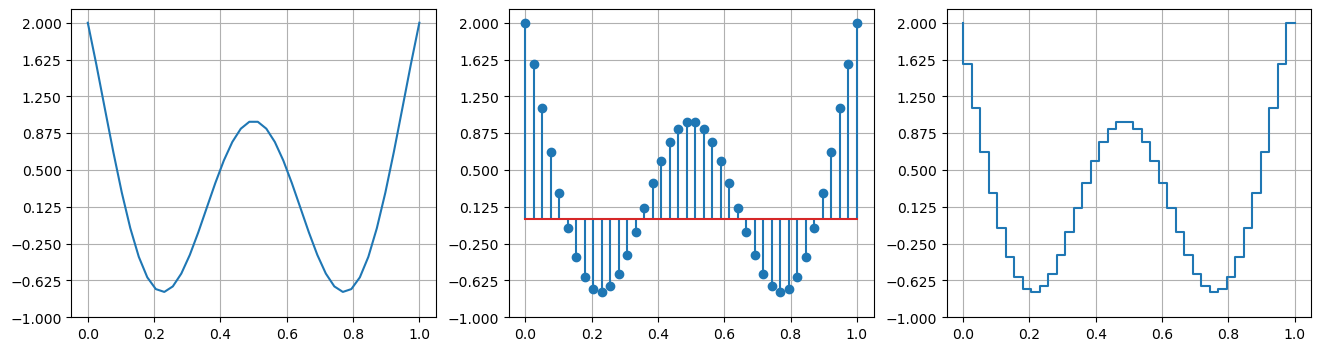

In [2]:
n = 40
t = np.linspace(0, 1, n, endpoint=True)
x = np.sin(np.pi*t) + 2*np.cos(2*np.pi*t) - 2*np.sin(3*np.pi*t)

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 3)
plt.step(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

Основной библиотекой для работы с сигналами и их обработки будет библиотека `scipy` и её отдельные расширения.
Импортируем звуковой файл и построим его график.

In [3]:
from scipy.io import wavfile

samplerate, data = wavfile.read('source/LetsGo.wav')

C:\Users\aleksandr\AppData\Local\Temp\1\ipykernel_28476\1797961333.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('source/LetsGo.wav')


In [4]:
samplerate

44100

In [5]:
length = data.shape[0] / samplerate
print(f"Длительность = {length}s")

Длительность = 3.571950113378685s


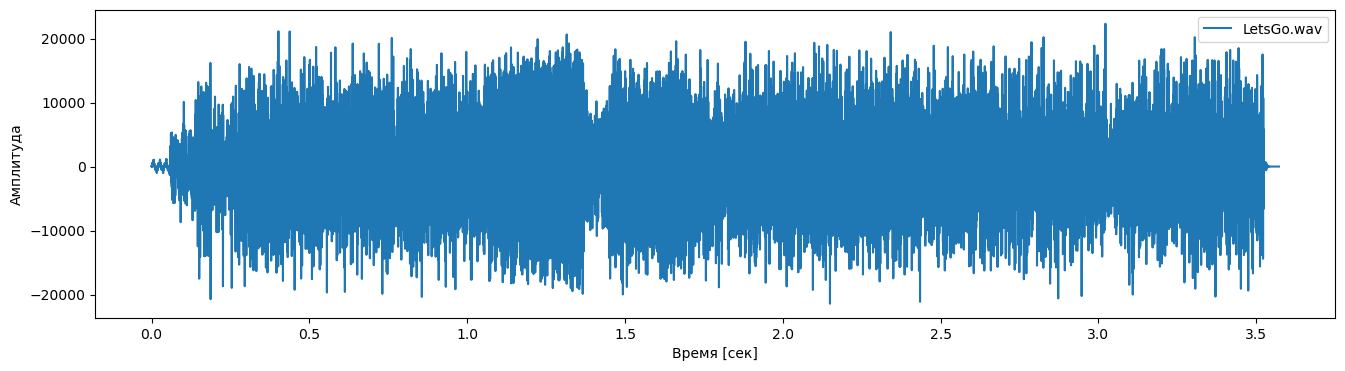

In [6]:
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(16, 4))
plt.plot(time, data, label="LetsGo.wav")
plt.legend()
plt.xlabel("Время [сек]")
plt.ylabel("Амплитуда");

Для воспроизведения аудио в рамках Python ноутбука удобно воспользоваться библиотекой `IPython`.

In [7]:
import IPython
IPython.display.Audio(data,rate=samplerate)
#IPython.display.Audio("LetsGo.wav")

### ДПФ

Для вычисления ДПФ используем пакет `fftpack` в библиотеке `scipy`, который содержит основные функции для вычисления ДПФ по быстрым алгоритмам.

    fft() - вычисление ДПФ
    ifft() - вычисление обратного ДПФ
    fftshift() - применяется к вектору спектра и циклически сдвигает его, так чтобы отсчёт соответствующий нулевой 
    частоте был в центре
    
Подключим требуемые библиотеки

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft

Сгенерируем сигнал, вычислим ДПФ, выведем графики

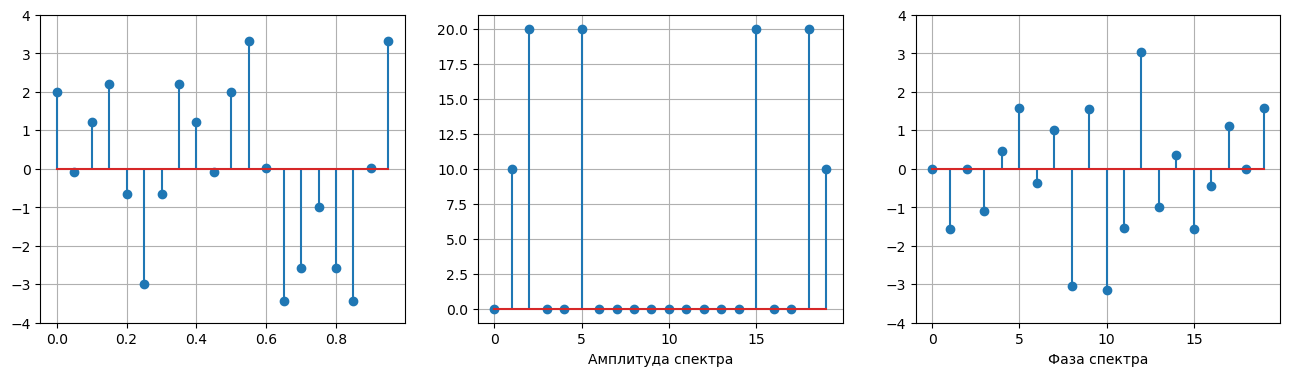

In [9]:
# сформируем 20 временных отсчётов от 0 до 1 (не включая)
n = 20
t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*t) + 2*np.cos(2*np.pi*2*t) - 2*np.sin(2*np.pi*5*t)
# для демонстрации эффекта растекания спектра, можно использовать сигнал ниже
# x = 2*np.cos(2*np.pi*2.5*t)

xFFT = fft(x)
# Амплитуда спектра
xA = np.abs(xFFT)
# Фаза спектра
xF = np.angle(xFFT)

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.stem(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(xA)
plt.yticks(np.linspace(0, np.ceil(np.max(xA)), 9))
plt.grid(True)
plt.xlabel('Амплитуда спектра')

plt.subplot(1, 3, 3)
plt.stem(xF)
plt.yticks(np.linspace(np.floor(np.min(xF)), np.ceil(np.max(xF)), 9))
plt.grid(True)
plt.xlabel('Фаза спектра');

Как видно 3 синусоиды на входе точно были отражены на графике амплитуды спектра. 

Если раскомментировать строчку
    `x = 2*np.cos(2*np.pi*2.5*t)`
то можно увидеть эффект растекания спектра. 

Если сигнал состоит из линейной комбинации базовых частот в ${\mathbb C}^N$, то эти частоты будут точно отражены в спектре. Это частоты вида $\{e^{-2 \pi i m \frac{n}{N}} \}_{n=0,...,N-1}$, где $m$ целое число. В ином случае даже сигнал вида $\{e^{-2 \pi i \omega \frac{n}{N}} \}_{n=0,...,N-1}$, где $\omega$ не целое число, будет содержать вклад каждого базового частотного отсчёта.

Напишем свою функцию для визуализации сигнала и его ДПФ. Функция будем основана на коде выше, однако добавим дополнительные возможности. 
1. Графики сигнала и его спектра будем отображать с помощью `plt.plot()` (то есть как график обычной функции, но надо помнить о том, что это всё дискретные сигналы).
2. При отображении спектра нулевую частоту будем изображать в центре с помощью метода `fftshift()`.
3. Будем отображать также вещественную и мнимую части спектра
4. Для сигналов с малым числом отсчётов будем использовать zero-padding (дополнение сигнала нулями), чтобы увеличить число отсчётов в спектре. На информацию в спектре это не влияет, но графики спектра будут более сглаженными.
5. Будем отображать шкалу по оси Ox для графиков спектра в нормализованных частотах. И добавим возможность отображать реальные частоты.

In [10]:
def myDFT_plot(t, x, N=512, fs = False):
    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    # Фаза спектра
    xF = np.angle(xFFT)

    xRe = np.real(xFFT)
    xIm = np.imag(xFFT)
    
    xList = [x, xA, xF, np.array([xRe, xIm]).T]
    titles = ['Сигнал', 'Спектр', 'Фаза', 'Re / Im']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([-0.5, 0.5])
                plt.xticks(np.linspace(-0.5, 0.5, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([-fs*0.5, fs*0.5])
                plt.xticks(np.linspace(-fs*0.5, fs*0.5, 11))
        plt.grid()
    plt.tight_layout()

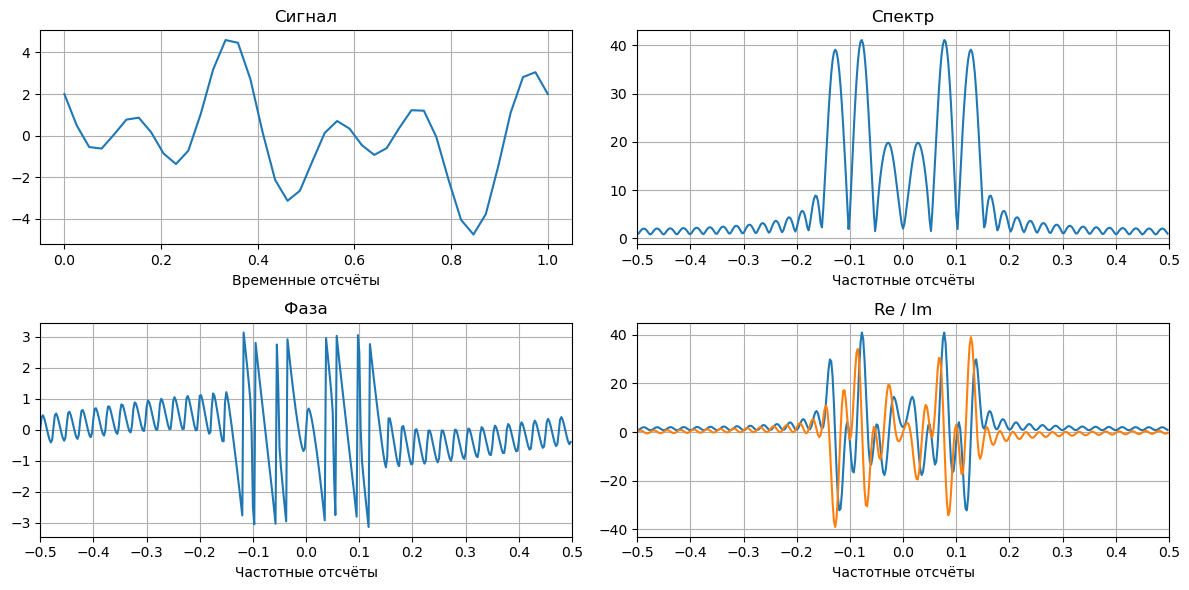

In [11]:
n = 40
t = np.linspace(0, 1, n, endpoint=True)
x = np.sin(2*np.pi*t) + 2*np.cos(2*np.pi*3*t) - 2*np.sin(2*np.pi*5*t)

myDFT_plot(t, x, 400)

C:\Users\aleksandr\AppData\Local\Temp\1\ipykernel_28476\1569752852.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('source/LetsGo.wav')


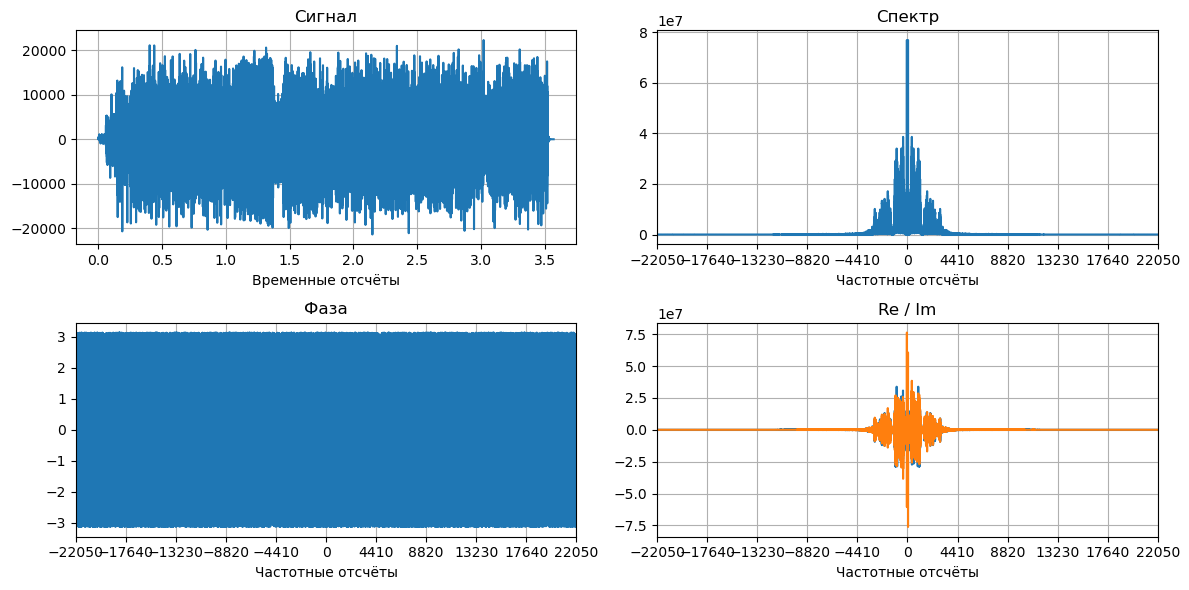

In [12]:
from scipy.io import wavfile

samplerate, data = wavfile.read('source/LetsGo.wav')
time = np.linspace(0., length, data.shape[0])
myDFT_plot(time, data, fs = samplerate)

Модифицируем этот код далее для демонстрации только амплитуды спектра, а точнее половины этой амплитуды. Также добавим возможность отсекать при отображении высокие частоты.

In [13]:
def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):
    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

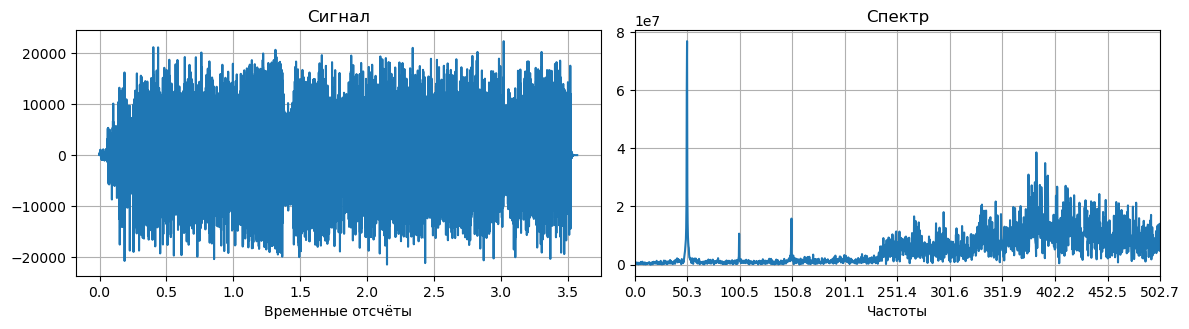

In [14]:
myDFT_AmplPlot(time, data, fs = samplerate, xLim=0.0114)

### Пример: очистка сигнала от шума

Для некоторых типов сигналов  ДПФ позволяет очень эффективно удалять шумы. Например, таким сигналом является зашумлённая линейная комбинация синусоид.

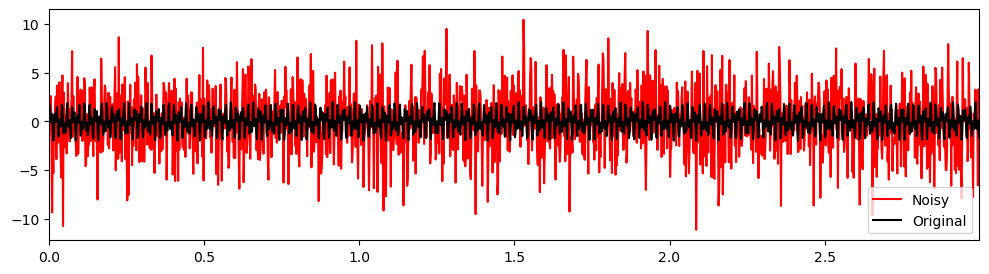

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fs = 512
T = 3
N = np.int32(fs * T)

t = np.linspace(0,T,N,endpoint=False)
sig_orig = np.sin(2*np.pi*55*t) + np.sin(2*np.pi*125*t)
sig_noise = sig_orig + 3*np.random.randn(len(t))

plt.figure(figsize=(12, 3))
plt.plot(t, sig_noise, color='r', label = 'Noisy')
plt.plot(t, sig_orig, color='k', label = 'Original')
plt.xlim(t[0],t[-1])
plt.legend()

В данном случае в зашумлённом сигнале во временной области визуально обнаружить какой либо полезный сигнал проблематично. 

Однако спектр сигнала ясно говорит о том, что сигнал состоит из шума и двух гармонических колебаний на частотах 55 и 125 Гц.

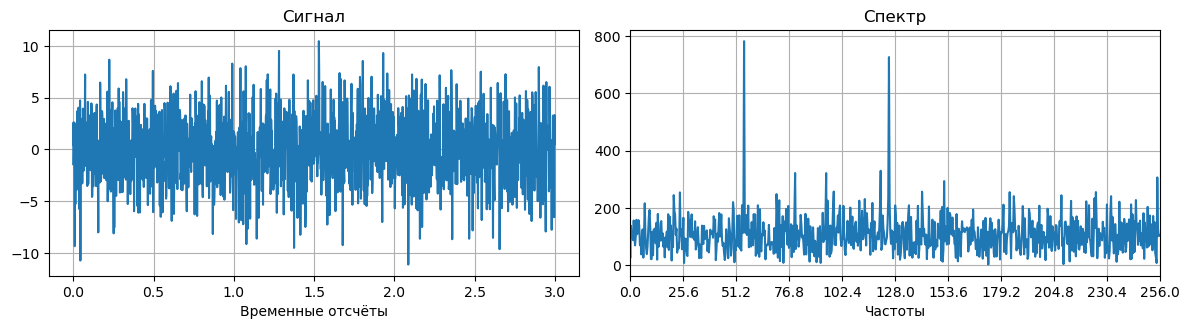

In [16]:
from scipy.fftpack import fft, ifft, fftshift

myDFT_AmplPlot(t,sig_noise, fs = fs)

Отделим эти частоты от шума. Для этого просто занулим те частоты, значение спектра в которых меньше 300.

[ 55. 125. 387. 457.]


C:\Users\aleksandr\anaconda3\envs\signals\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


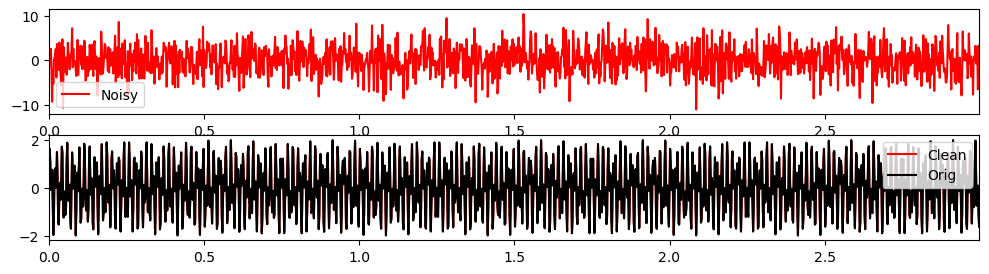

In [17]:
n=len(t)
sigF = fft(sig_noise,n)
sigFA = np.abs(sigF)
ind = sigFA > 400
sigF_clean = sigF * ind
sig_clean = ifft(sigF_clean)

pos = np.where(ind==True)[0]/T
print(np.round(pos))

plt.figure(figsize=(12, 3))
plt.subplot(2,1,1)
plt.plot(t, sig_noise, color='r', label = 'Noisy')
plt.xlim(t[0],t[-1])
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, sig_clean, color='r', label = 'Clean')
plt.plot(t, sig_orig, color='k', label = 'Orig')
plt.xlim(t[0],t[-1])
plt.legend()

Для оценки "величины" шума в сигнале используется такая метрика как SNR (signal-to-noise ratio). Напишем специальную функцию для её вычисления.


In [18]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

Сравним SNR до и после очистки от шума:

In [19]:
print("SNR в зашумлённом сигнале:", mySNR(sig_orig,sig_noise-sig_orig))
print("SNR в очищенном сигнале:", mySNR(sig_orig,sig_clean-sig_orig))

SNR в зашумлённом сигнале: -9.677331979089569
SNR в очищенном сигнале: 27.824838631436663


### Пример: DTMF технология



In [20]:
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

keys = ['1','2','3','4','5','6','7','8','9','*','0','#']
rowTones = np.array([697, 770, 852, 941]);
colTones = np.array([1209, 1336, 1477]);
fs = 8000
ts = 1/8000

phoneNumber = '89057428569'
phoneNumber = list(phoneNumber)
phoneNumber

['8', '9', '0', '5', '7', '4', '2', '8', '5', '6', '9']

In [21]:
def encode(phoneNumber):
    y = [0]
    for char in phoneNumber:
        try :
            i = keys.index(char)
        except ValueError as e:
            print(e)
            continue
        ind1 = rowTones[(i)//3] #row
        ind2 = colTones[(i)%3] #column
        #print(ind1,',',ind2)
        # длительность нажатия
        dur1=0.3
        #dur1=0.3 + 0.2*np.random.uniform(-1/2,1/2);
        # длительность тишины
        dur2=0.15
        #dur2=0.15 + 0.1*np.random.uniform(-1/2,1/2);

        t = np.arange(0,dur1,ts)
        sig = np.sin(2*np.pi*ind1*t) + np.sin(2*np.pi*ind2*t)    
        n = int(dur2*fs)

        y = y + list(sig) + [0] * n
        
    y_orig = y
    y = np.array(y) + 0.5 * np.random.randn(len(y))
    print('SNR: ', mySNR(y_orig, y))
    return y

SNR:  -1.383640587650878


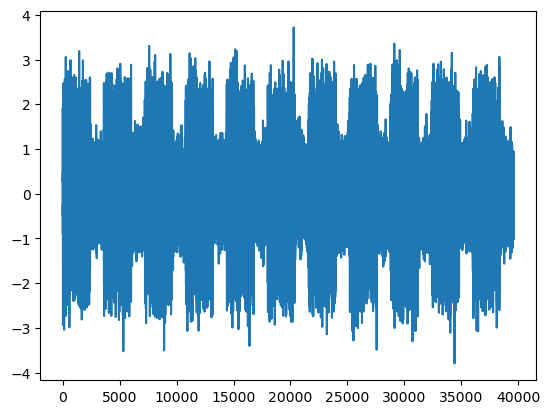

In [22]:
y = encode(phoneNumber)
plt.plot(y)

In [23]:
import IPython
IPython.display.Audio(y,rate=fs)

In [24]:
fs = 8000
ts = 1/8000
dur = y.shape[0] / fs
t = np.arange(0,dur,ts)

In [25]:
rowTones = np.array([697, 770, 852, 941])
colTones = np.array([1209, 1336, 1477])

In [26]:
t.shape

(39601,)

In [27]:
y.shape

(39601,)

In [28]:
amp = np.abs(fft(y))
ind1 = amp == 770 # and y !=770 #, 852, 941, 1209, 1336, 1477]
# ind2 = y < 700
# ind2 = y == 770
# ind3 = y != 697
# ind4 = y != 697
# ind5 = y != 697
# ind6 = y != 697
# ind7 = y != 697
y_clean = y * ind1
# sig_clean = ifft(sigF_clean)

In [29]:
np.max(amp)

6645.653878278366

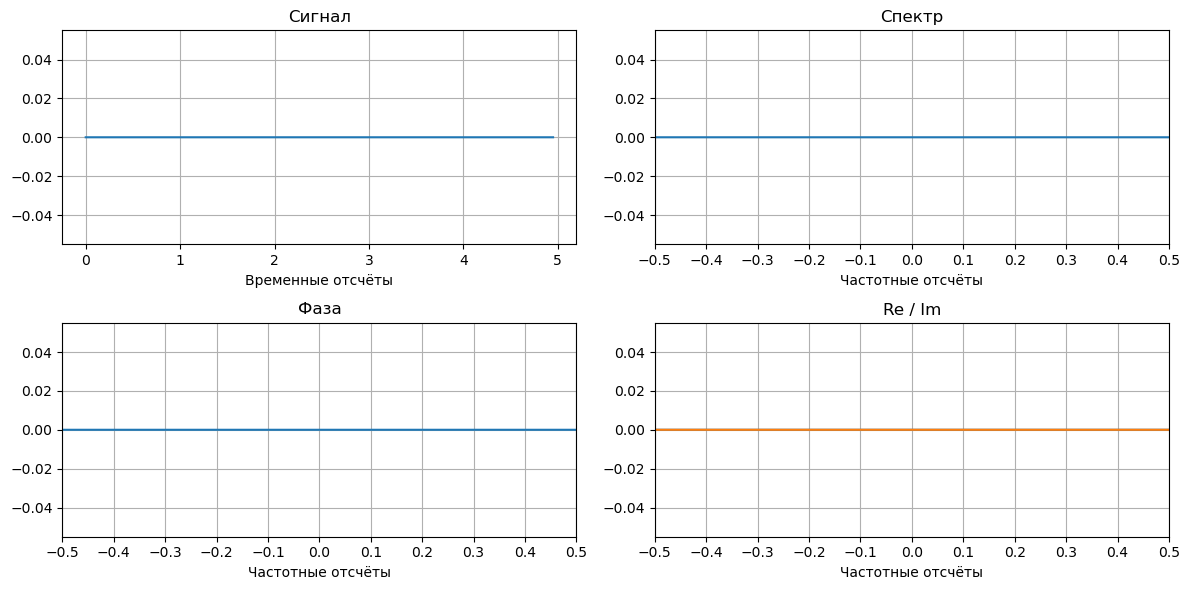

In [30]:
myDFT_plot(t, y_clean, N=y.shape[0])

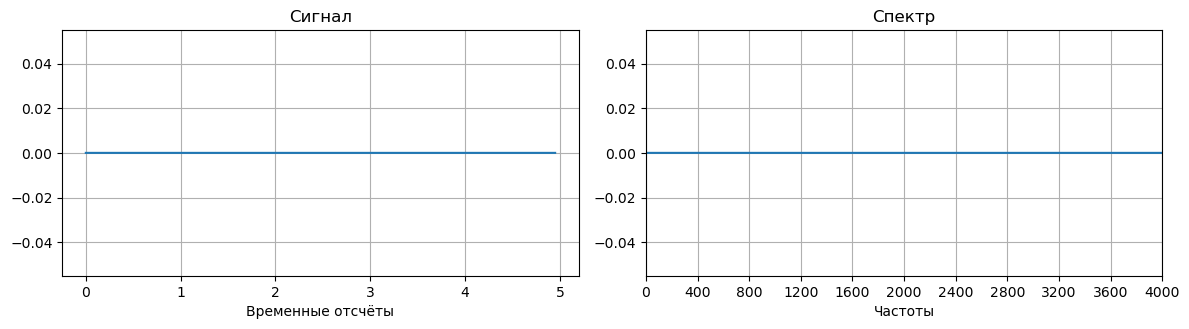

In [31]:
myDFT_AmplPlot(t,y_clean, fs = fs)

Как обнаружить закодированные частоты?

В папке signals есть 10 тестовых сигналов, которые надо раскодировать и понять, какой номер был набран.

In [32]:
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    length = sig.shape[0] / fs
    print(fs, sig.shape[0], length)

8000 39948 4.9935
8000 39240 4.905
8000 38263 4.782875
8000 38863 4.857875
8000 40509 5.063625
8000 41461 5.182625
8000 39807 4.975875
8000 35829 4.478625
8000 37857 4.732125
8000 39364 4.9205


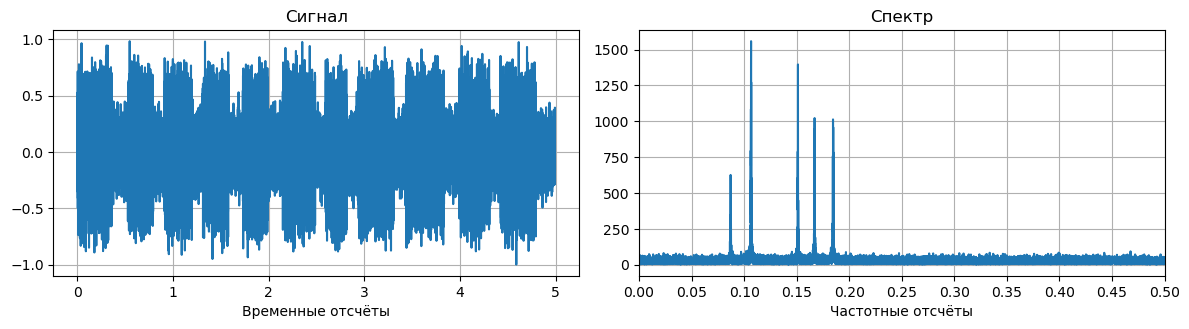

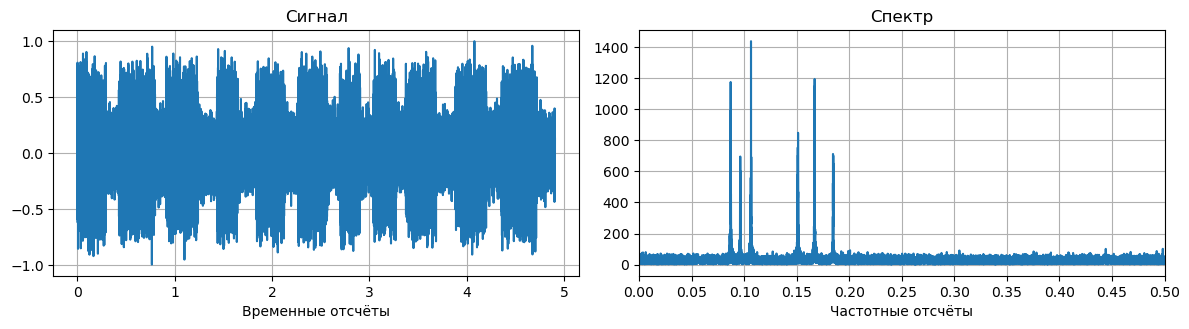

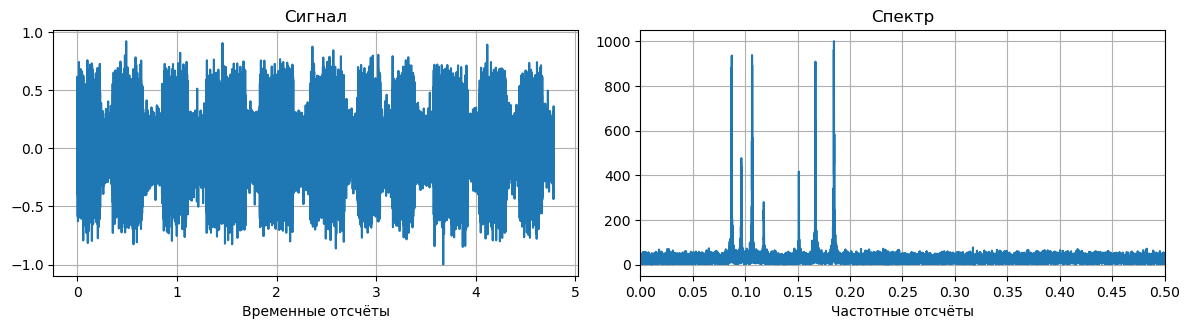

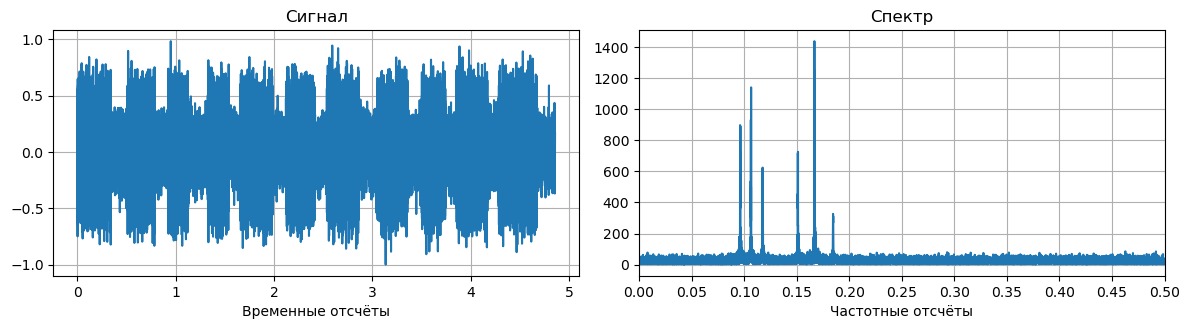

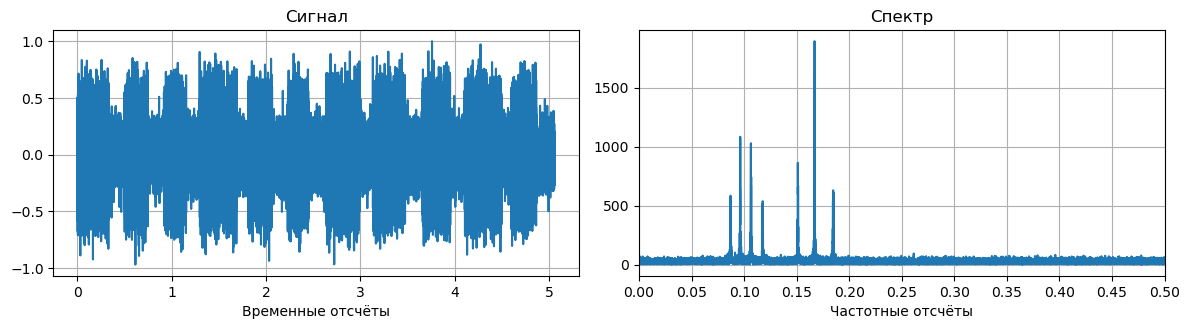

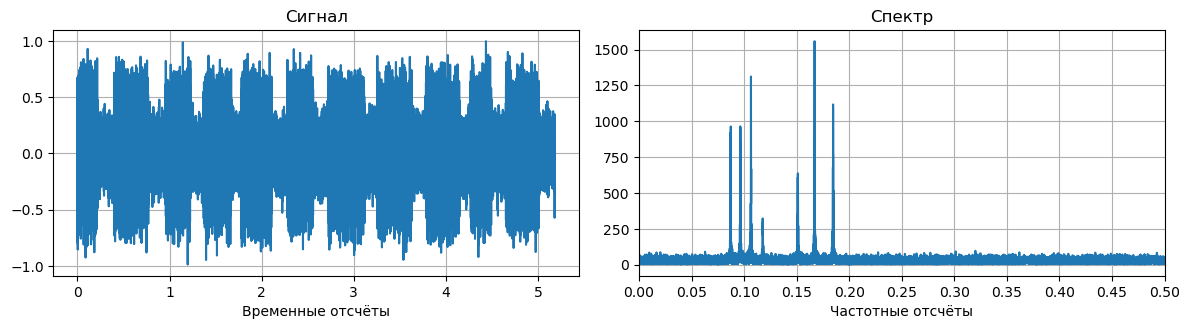

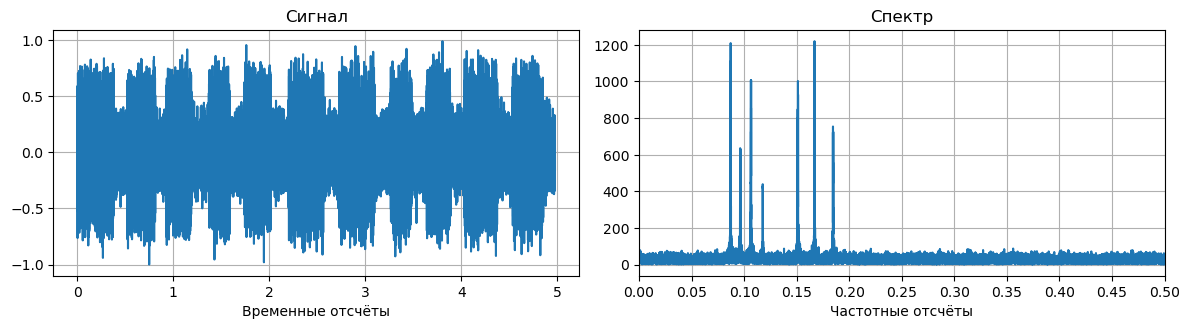

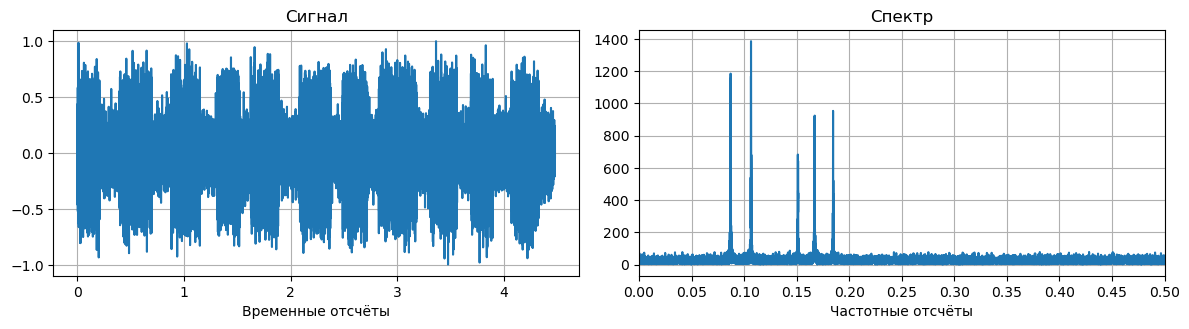

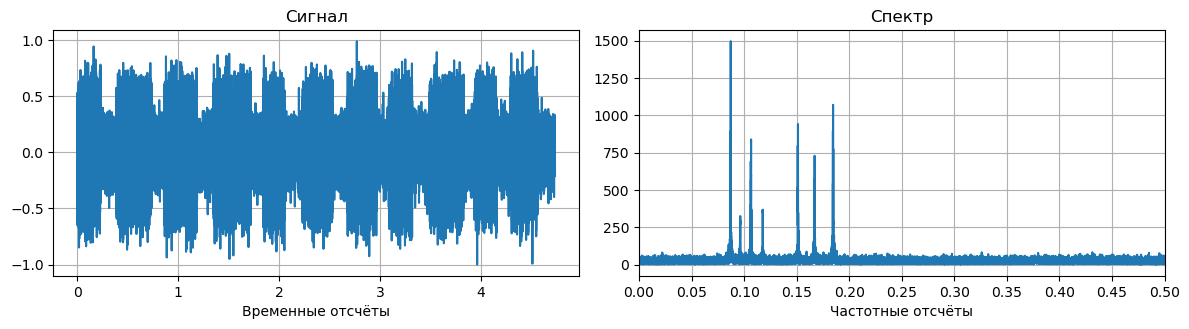

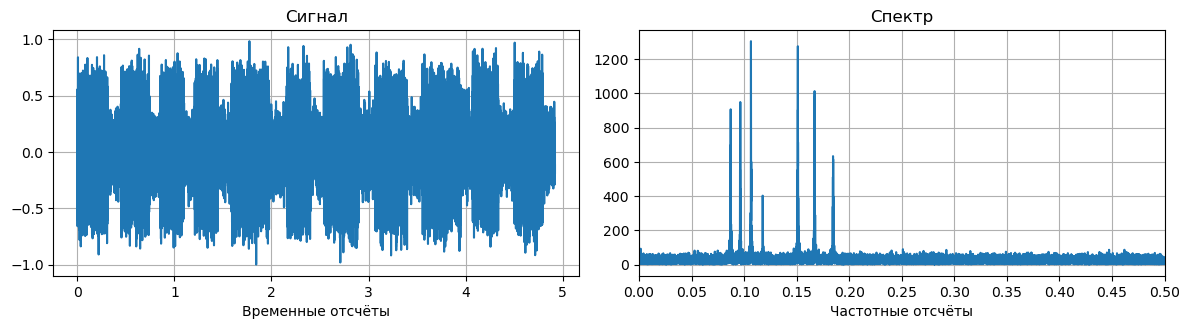

In [33]:
sample_count = 100
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs

    t = np.linspace(0, duration, N)
    myDFT_AmplPlot(t, sig)

In [34]:
sampleN = 100
xLim = 2000
for i in range(1):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs
    for k in range(int(N / sample_count)):
        sample = sig[k*sample_count : (k+1)*sampleN]
        sampleA = np.abs(fftshift(fft(sample)))
        print(np.max(sampleA) / np.median(sampleA))
        # plt.figure(figsize=(12, 3))
        # plt.xlim([0, xLim])
        # plt.plot(fs*np.arange(-np.floor(sampleN/2), np.floor((sampleN+1)/2))/sampleN,  sampleA)
        # plt.show()
        # print(np.max(sampleA))
        # if (np.max(sampleA) < 500):
        #     print(".", end="")
        # else:
        #     print("!", end="")
        # print()

10.123447
7.511937
9.888106
9.891027
8.578381
8.147418
6.937158
8.25893
8.254975
8.892489
8.269955
8.536938
8.260096
10.980797
9.3911
9.293428
8.1883
7.6191072
7.0791545
7.6927195
7.389132
9.67287
8.127956
6.791737
7.7524147
7.8155007
7.9275355
7.5028534
6.059735
2.3820057
2.6179674
2.791809
3.3573773
2.7792184
1.8748933
2.5251782
2.7697327
2.4392967
2.6391618
3.1014135
3.7063634
1.8213948
4.6441603
6.8029675
7.8300295
9.214228
5.3129897
7.477251
6.1222305
7.8000646
8.384332
9.174041
6.4861765
5.2962623
6.327593
8.154873
7.580341
9.237625
6.7470922
8.782531
7.898854
8.633247
7.2871614
3.863998
2.5527318
2.6000142
3.0924375
2.36163
2.5201108
2.6279805
2.8462799
2.2237296
3.1938663
8.625264
8.96702
10.00788
9.074283
8.776518
7.4807453
10.072563
7.1583056
7.365609
8.73804
7.9347825
8.513433
10.367047
8.429491
9.409912
7.9666963
7.0725985
9.197863
8.98101
9.612196
8.245141
7.855084
6.3873377
2.3377495
2.403936
2.778986
2.50229
2.7390199
2.5479455
2.9682257
2.8273249
2.4294639
10.900094
9.3